In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.math import confusion_matrix

## LOADING IMAGE(MNIST) DATA FROM KERAS:

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train) , (x_test , y_test) = mnist.load_data()

In [4]:
type(x_train)

numpy.ndarray

#### Here the dataset is already processed and stored in keras dataset. All the images have been already converted into the numpy array.

In [5]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Here all the images are Gray-Scale images in dataset. (60000, 28, 28) tells that there are total 60k images the dataset, each of 28 x 28 height and width with the pixel value that range from 0 to 255 (where 0 & 255 signifies that pixel is completely Black & completely White). Here we have Training data: 60k & Test data: 10k.

### Displaying an image with it's label:

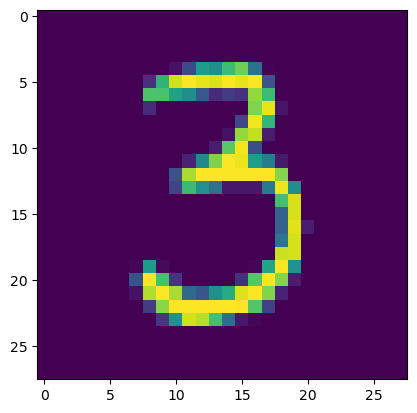

The value of the image at 50th index in dataset is:  3


In [6]:
# Image at 50th index in dataset:
plt.imshow(x_train[50])
plt.show()

# The target of the 50th image is:
print('The value of the image at 50th index in dataset is: ', y_train[50])

In [7]:
print('Displaying how the image is actually stored in the dataset in form of the matrix:')
print()
print(x_train[50])

Displaying how the image is actually stored in the dataset in form of the matrix:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   

## SCALING THE DATASET:
We Scale the dataset to ensure that all features have a similar range, preventing certain features from dominating the learning process due to their larger value. Here we divide all the elements of the matrix by 255 in the i/p features (namely x_train & x_test), this brings the range of values from 0 to 1.

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
print('Displaying the 50th index matrix, after scaling all the elements:\n')
print(x_train[50])

Displaying the 50th index matrix, after scaling all the elements:

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        

## BUILDING THE NEURAL NETWORK:

In [10]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape = (28,28)),      # INPUT LAYER; Here our matrix is of shape 28 x 28 as it is grayscale, but if
                                                                          # it was RGB we had to give the matrix shape as (28, 28, 3) because we would 
                                                                          # have 3 more matrices of the same order.
                        keras.layers.Dense(50, activation = 'relu'),      # 1st HIDDEN LAYER
                        keras.layers.Dense(65, activation = 'relu'),      # 2nd HIDDEN LAYER
                        keras.layers.Dense(10, activation = 'sigmoid')    # OUTPUT LAYER; We have 10 o/p(0 - 9), so no. of neurons in o/p layer is 10.
])

C:\Users\HARSH\OneDrive\Documents\Anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## COMPILING THE NEURAL NETWORK:

In [11]:
model.compile(optimizer = 'adam',                         # optimizer is used to find the most optimal parameters for the model.
              loss = 'sparse_categorical_crossentropy',   # loss function tells what the model is trying to minimize.
              metrics = ['accuracy']
)

## TRAINING THE MODEL ON THE DATA:

In [12]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8479 - loss: 0.5307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9570 - loss: 0.1461
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9686 - loss: 0.1050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0817
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9795 - loss: 0.0662
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9838 - loss: 0.0541
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9867 - loss: 0.0451
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9886 - loss: 0.0387
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0342
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0286


In [13]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.1392


## PREDICTING OUTPUT USING THE MODEL:

In [14]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
print('The value of the 1st data point in training set is: ', y_test[0])
print('\nThe predicted value of the 1st data point by the model is:')
print(y_pred[0])

The value of the 1st data point in training set is:  7

The predicted value of the 1st data point by the model is:
[6.3994289e-03 2.4949288e-04 3.3579886e-02 9.5575011e-01 2.7940451e-04
 2.3122928e-03 1.6775656e-11 9.9999940e-01 7.6235041e-02 7.6557636e-01]


### NOTE: 
The .predict() in deep learning gives a list of prediction probability of each class for that particular data point. Here we can have 10 different o/p
(0 to 9), so the model gives list of 10 different values each telling the probability of a class, the class that has highest probability is considered as o/p. Here we can see 7th index of the list has highest probaility, hence o/p is: 7.

### Converting the Prediction Probability into class label:

In [16]:
first_value = np.argmax(y_pred[0])                          # .argmax() returns the index of the largest value in the list.
print(first_value)

7


### Converting the Prediction Probability into class label for all data points:

In [17]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Now instead of giving a list of probabilities, it returns the max value of that particular list. This max value represents the predicted o/p by the model for each 10k testing data points.

## EVALUATION OF THE MODEL USING CONFUTION MATRIX:

In [18]:
con_mat = confusion_matrix(y_test , y_pred_label)
print(con_mat)

tf.Tensor(
[[ 964    0    2    3    3    0    0    1    1    6]
 [   0 1122    2    3    0    0    5    0    3    0]
 [   4    1  984   18    7    1    3    8    5    1]
 [   0    0    4  990    1    0    0    7    1    7]
 [   1    0    2    0  966    0    4    1    0    8]
 [   5    1    0   28    2  838    6    0    6    6]
 [   3    3    1    1    5    7  937    0    0    1]
 [   1    3    6    5    3    0    0  998    1   11]
 [   3    0    5   31    8    3    6    7  901   10]
 [   1    3    0    4   11    0    0    6    2  982]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted Label')

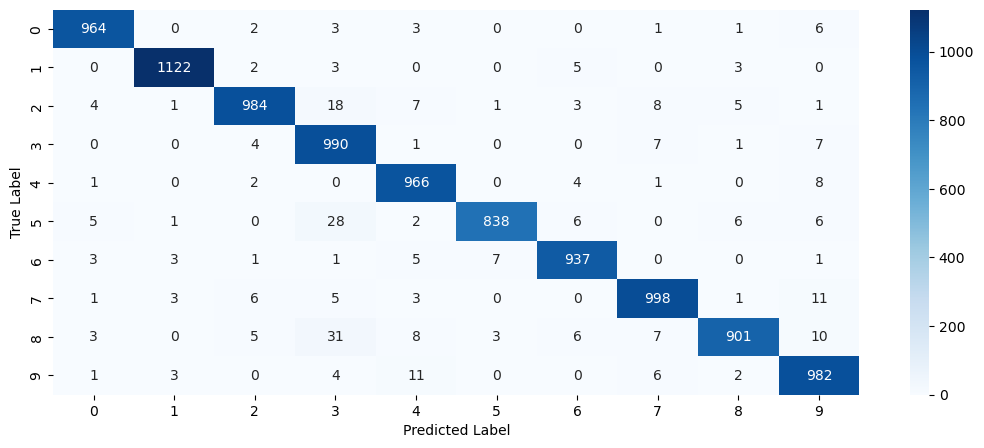

In [19]:
# Plotting confusion matrix using heatmap:

plt.figure(figsize = (13, 5))
sns.heatmap(con_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

The above heatmap is of confusion matrix on the test data. Here an element 'E' with coordinate (x,y) tells that E number of data points were predicted as class x, whereas there actual class is y. For i.e: (3,0) E=2; means that 2 data points were predicted as 3 (class 3), whereas they are actually 0 (class 0).

## BUILDING THE PREDICTIVE SYSTEM:

In [20]:
import cv2
import matplotlib.image as mpimg

Enter the path of the digit image:
 C:/Users/HARSH/OneDrive/Documents/ML Training Data/MNIST_7_image.png


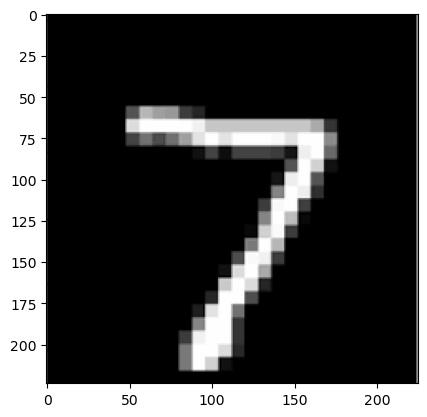

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

The image given represents number:  7


In [21]:
# Taking the image from the user:
img_path = input('Enter the path of the digit image:\n')                 # C:/Users/HARSH/OneDrive/Documents/ML Training Data/MNIST_7_image.png
input_image = cv2.imread(img_path)                                       # Automatically stores the image into nd-array
img_plot = plt.imshow(input_image)                                       # Displaying the image
plt.show()

# Converting the image into a grayscale image:
gry_img = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

# Resizing the input image into 28 x 28:
re_img = cv2.resize(gry_img , (28,28))

# Scaling the image to be in the range from 0 to 1:
img = re_img/255

# Reshaping the input:
input_img = np.reshape(img , [1, 28, 28])                         # Here the 1 tells that we are only going to predict value for 1 image of dimension 
                                                                  # 28 x 28.

# Predicting the image value using our trained model:
img_pred = model.predict(input_img)

# Taking the highest probability class:
img_label = np.argmax(img_pred)
print('\nThe image given represents number: ', img_label)